<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/%5BDL0%5D_Celsius_para_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



- Equação para conversão: **T(°F) = T(°C) × 9/5 + 32**

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 2: Importação da base de dados

In [ ]:
temperature_df = pd.read_csv('/content/Celsius-to-Fahrenheit.csv')
temperature_df.reset_index(drop = True, inplace = True)

In [ ]:
temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [ ]:
temperature_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [ ]:
temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [ ]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# Etapa 3: Visualização da base de dados

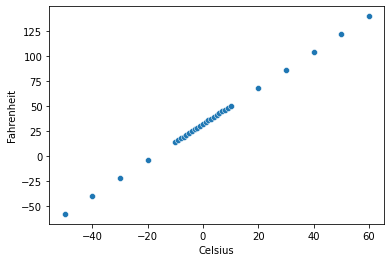

In [ ]:
#sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit']); atualizado 18/01/2021
sns.scatterplot(x=temperature_df['Celsius'], y=temperature_df['Fahrenheit'])

# Etapa 4: Configuração da base de dados de treinamento

In [ ]:
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

In [ ]:
X_train.shape

(30,)

In [ ]:
y_train.shape

(30,)

# Etapa 5: Construção e treinamento do modelo

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 6976.9321
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 6627.0708
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 6287.7207
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 5959.0498
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 5641.2090
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 5334.3364
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 5038.5488
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 4753.9404
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 4480.5854
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 4218.5322
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 3967.8044
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 3728.4011
Epoch 13/500
1/1 [========

# Etapa 5: Avaliação do modelo

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

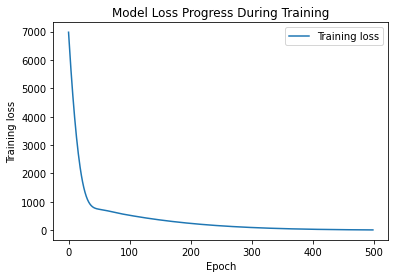

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [ ]:
model.get_weights()

[array([[1.812216]], dtype=float32), array([29.005394], dtype=float32)]

In [ ]:
temp_c = 10
temp_f = model.predict([temp_c])
temp_f

array([[47.127556]], dtype=float32)

In [ ]:
temp_f1 = 9/5 * temp_c + 32
temp_f1

50.0